In [21]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [22]:
path = r'C:\Users\mauri\OneDrive\Documentos\Instacart Basket Analysis'

In [23]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'merged_data_good.pkl' ))

<AxesSubplot:>

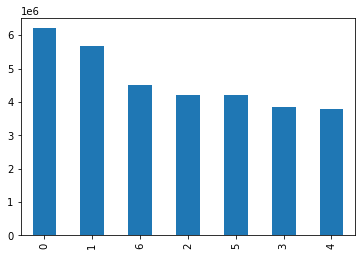

In [24]:
# Prepare bar chart 
df['orders_day_of_week'].value_counts().plot.bar()


<AxesSubplot:>

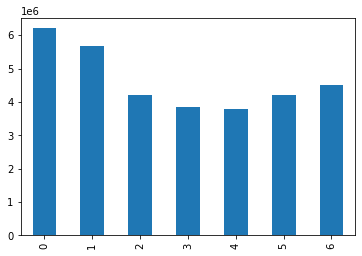

In [25]:
# Sorting by index
df['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [26]:
# Can be used in normal value counts
df['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

<AxesSubplot:>

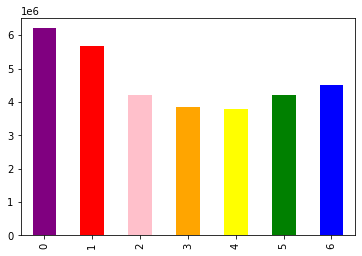

In [27]:
# Adding color 
df['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

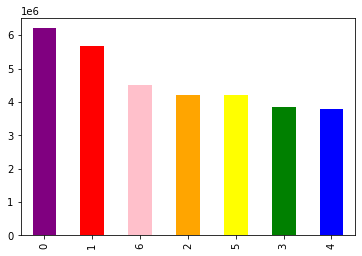

In [28]:
bar = df['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])


In [29]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

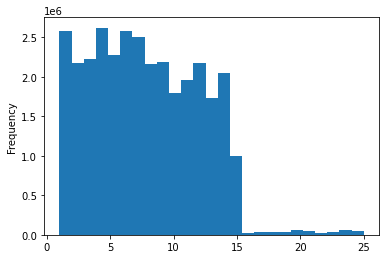

In [30]:
df['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

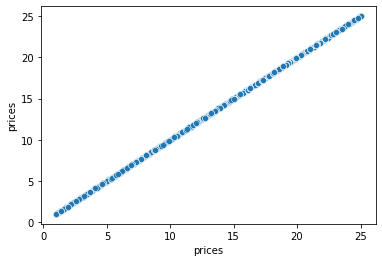

In [31]:
sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [32]:
# Data was dirty, starting cleaning process
df.loc[df['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,...,prices,_merge,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,order_frequency,order_frequency_flag


In [33]:
df.loc[df['prices'] >100, 'prices'] = np.nan

In [34]:
df['prices'].max()

25.0

In [35]:
# Data was cleaned 

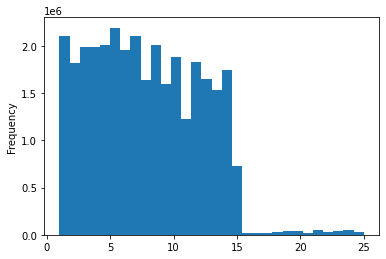

In [36]:
# More bins = thinner bars
bar_prices = df['prices'].plot.hist(bins = 30)

In [38]:
# Creating a list holding T/F to test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [39]:
bar_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_prices.png'))

In [40]:
big = df[dev]
small = df[~dev]

In [41]:
# checking mathc
len(df)

32404859

In [42]:
len(big) + len(small)

32404859

In [43]:
df_2 = small[['orders_day_of_week','prices']]

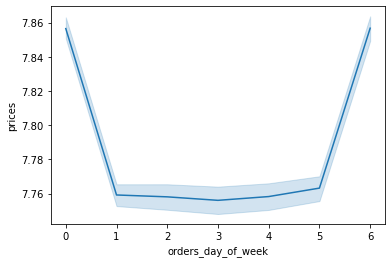

In [44]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [45]:
df.to_pickle(os.path.join(path, '02 Data',  'Prepared data', 'merged_data_good.pkl'))